# 摘要

# 理论模型

广义的焦炭是指用烟煤、石油、沥青或者其他液体碳氢化合物为原料，在隔绝空气的条件下干馏得到的固体产物。

大商所焦炭期货所指的焦炭是指以炼焦煤为主要原料，在隔绝空气条件下通过室式焦炉中加热至 950~1050℃ 干馏得到的固体产物。

生产 1 吨焦炭约消耗 1.33 吨炼焦煤，焦炭既可以作为还原剂、能源和供炭剂用于高炉炼铁、冲天炉铸造、铁合金冶炼和有色金属冶炼，也可以应用于电石生产、气化和合成化学等领域。据统计，世界焦炭产量的 90％ 以上用于高炉炼铁，冶金焦炭已经成为现代高炉炼铁技术的必备原料之一，被喻为钢铁工业的“基本食粮”，具有重要的战略价值和经济意义。

![焦炭](.\images\焦炭.PNG)


## 生产

将炼焦煤在密闭的焦炉内隔绝空气高温加热放出水分和吸附气体，随后分解产生煤气和焦油等，剩下的物质就成为以碳成分为主体的焦炭。

煤热解成为焦炭的过程通常称为煤的干馏。根据干馏最终温度的不同分为：低温干馏（500~600℃），中温干馏（700~800℃），高温干馏（900~1000℃）。目前的炼焦炉绝大多数属于高温炼焦炉，即高温干馏，主要生产冶金焦、炼焦煤气和炼焦化学产品。

在焦炉内，炼焦煤在加热到 400℃ 左右时，就开始形成熔融的胶质体，并不断地自身裂解产生出油气，这类油气经过冷凝、冷却及回收工艺，得到各种化工产品和净化的焦炉煤气。焦炉煤气发热值高，是钢铁厂及民用的优质燃料，又因其含氢量多，也是生产合成氨的原料。当温度继续升高，油气不断放出，胶质体进一步分解，部分气体析出，胶质体逐渐固化成半焦，同时产生出一些小气泡，成为固定的疏孔。温度再升高，半焦继续收缩，放出一些油气，最后生成焦炭。

![焦炭生产工艺](images\焦炭生产工艺.PNG)

## 用途

根据原料煤的性质、干馏的条件不同，可以形成不同规格和质量的高温焦炭：
* 冶金焦：其中用于高炉冶炼的称高炉焦，用于冲天炉熔铁的称铸造焦，用于铁合金生产的称铁合金焦，还有非金属冶炼用焦
* 化工焦：其中又分为：气化焦、电石焦、高硫焦
* 碳素焦：其中又分为：石油焦、沥青焦、针状焦
* 铝阳焦
* 电极焦
* 高强度低灰低硫焦

焦炭在高炉冶炼过程中有四个作用：
* 供热：高炉冶炼所需要的热量是由焦炭和喷吹燃料的燃烧及热风提供的，其中焦炭燃烧提供的热量占75%~80%。
* 还原：高炉中矿石的还原是通过间接还原和直接还原完成的
* 柱料骨架
* 供碳：生铁中的碳全部来源于高炉焦，进入生铁的碳占焦炭含碳量的 7%~9%。焦炭中的碳从高炉软融带开始渗入生铁；在滴落带，滴落的液态铁与焦炭接触时，碳进一步渗入生铁，最后可使生铁的碳含量达到 4% 左右。

## 价格影响因素

**宏观经济**

**产业政策**

产业政策的变化会直接影响煤炭生产企业的生产成本。

**库存因素**

库存反映供需平衡情况。

**需求因素**

焦炭是焦煤的下游产品，两者价格高度正相关。焦炭比焦煤更接近终端产品，对市场需求的反映更快，反映幅度更大。焦炭生产量代表市场对焦煤的需求。一般而言，需求变化领先于焦煤价格变化。

粗钢产量也反映市场对焦煤的需求。粗钢产量月同比增长变化趋势与焦煤价格走势总体一致，且领先于焦煤价格变化。

# 实证分析

In [1]:
# coding=utf-8
import sys
sys.path.append("D:\\HST\\QuantStudio")
sys.path.append("C:\\Users\\hushuntai\\svn\\python")
import datetime as dt

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook

import QuantStudio.api as QS
WDB = QS.FactorDB.WindDB2()

from WindPy import w

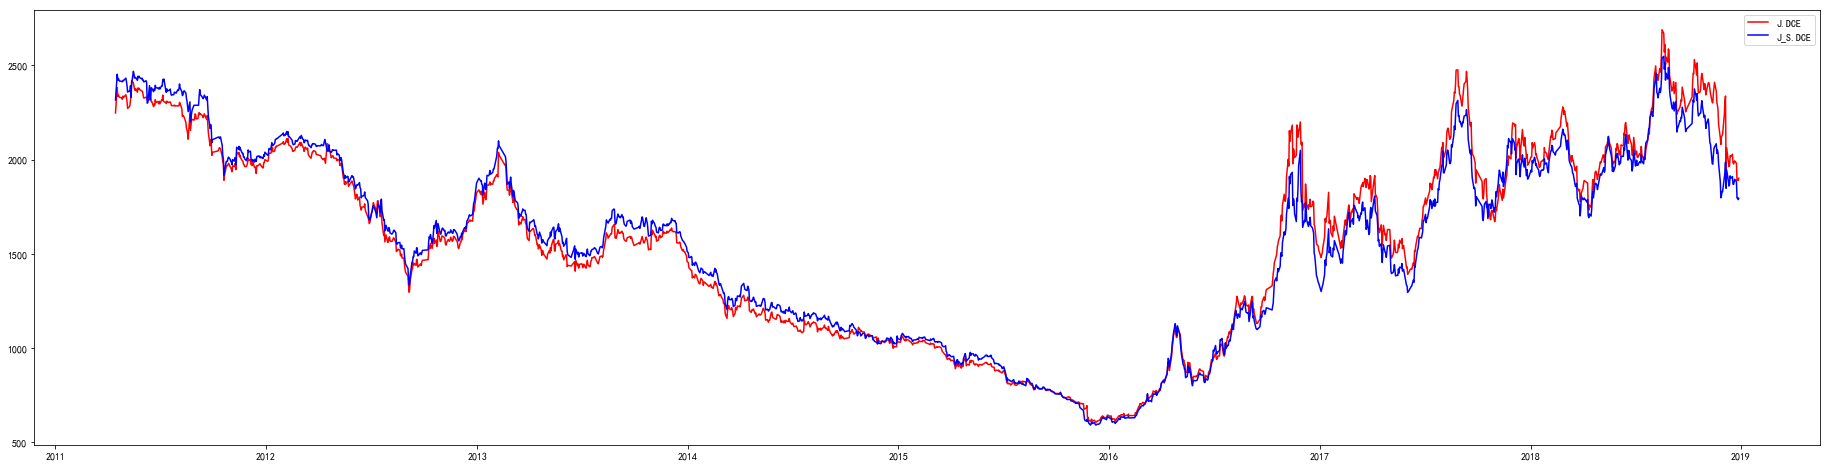

In [3]:
# 参数设置和数据准备
Exchange = "DCE"
MID, SID = "J.DCE", "J_S.DCE"# 主力和次主力合约
StartDT = dt.datetime(2011, 4, 15)# 回测开始日期
EndDT = dt.datetime(2018, 12, 31)# 回测截止日期
PriceFactor = "收盘价(元)"

WDB.connect()
DTs = WDB.getTable("中国期货交易日历").getDateTime(iid=Exchange, start_dt=StartDT, end_dt=EndDT)
# 获取连续合约的月合约 ID
FT = WDB.getTable("中国期货连续(主力)合约和月合约映射表")
FutureIDMap = FT.readData(factor_names=["映射月合约Wind代码"], ids=[MID, SID], dts=DTs).iloc[0,:,:]
# 获取价格数据
FT = WDB.getTable("中国商品期货日行情")
CCPrice = FT.readData(factor_names=[PriceFactor], ids=[MID, SID], dts=DTs).iloc[0]
MonthIDs = FutureIDMap.values.flatten()
MonthIDs = sorted(np.unique(MonthIDs[pd.notnull(MonthIDs)]))
MonthPrice = FT.readData(factor_names=[PriceFactor], ids=MonthIDs, dts=DTs).iloc[0]
WDB.disconnect()
# 对连续合约的价格进行调整
AdjCCPrice = {iID: QS.Tools.Strategy.genContinuousContractPrice(FutureIDMap[iID], MonthPrice, adj_direction="前复权", adj_type="收益率不变", rollover_ahead=True) for iID in CCPrice.columns}
AdjCCPrice = pd.DataFrame(AdjCCPrice).loc[:, CCPrice.columns]

Fig, Axes = plt.subplots(1, 1, figsize=(32, 8))
Axes.plot(CCPrice.index, CCPrice.values[:, 0], color='r', label=CCPrice.columns[0])
Axes.plot(CCPrice.index, CCPrice.values[:, 1], color='b', label=CCPrice.columns[1])
Axes.legend(loc='best');

# 附录

## 期货合约

![焦炭期货合约](.\images\焦炭期货合约.PNG)

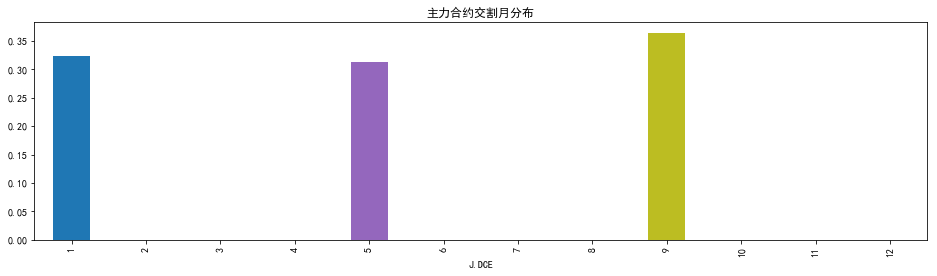

In [18]:
# 获取主力合约的月合约的交割月分布
import re
ExpiryMonth = FutureIDMap[MID].apply(lambda x: int(re.sub("\D", "", x)[-2:]))
ExpiryMonthDistribution = ExpiryMonth.groupby(by=ExpiryMonth).count() / ExpiryMonth.shape[0]
ExpiryMonthDistribution = ExpiryMonthDistribution.loc[np.arange(1, 13)].fillna(0)
ExpiryMonthDistribution.plot(kind="bar", figsize=(16, 4), title="主力合约交割月分布");

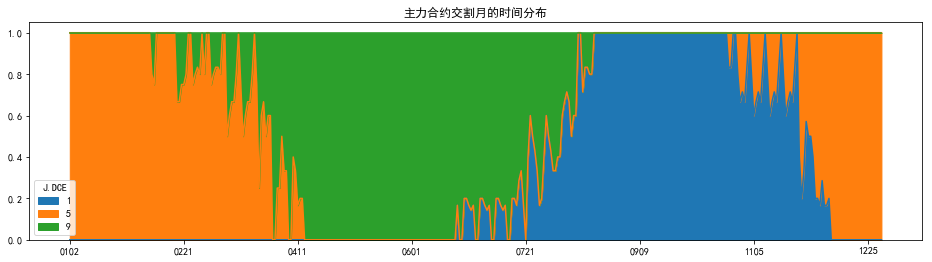

In [49]:
# 获取主力合约切换的时间分布
ExpiryMonth = FutureIDMap[MID].apply(lambda x: int(re.sub("\D", "", x)[-2:]))
MonthDay = pd.Series([iDT.strftime("%m%d") for iDT in ExpiryMonth.index], index=ExpiryMonth.index)
ExpiryMonthDistributionPerYear = ExpiryMonth.groupby(by=[ExpiryMonth, MonthDay]).count().unstack()
ExpiryMonthDistributionPerYear = (ExpiryMonthDistributionPerYear / ExpiryMonth.groupby(by=MonthDay).count()).T
ExpiryMonthDistributionPerYear = ExpiryMonthDistributionPerYear.fillna(0)
Fig, Axes = plt.subplots(1, 1, figsize=(16, 4))
Axes = ExpiryMonthDistributionPerYear.plot(kind="area", ax=Axes, title="主力合约交割月的时间分布")
xTicks = Axes.get_xticks().astype(np.int)
xTickLabels = np.full(shape=xTicks.shape, fill_value="", dtype="O")
Mask = ((xTicks>=0) & (xTicks<ExpiryMonthDistributionPerYear.shape[0]))
xTickLabels[Mask] = ExpiryMonthDistributionPerYear.index.values[xTicks[Mask].tolist()]
Axes.set_xticklabels(xTickLabels);

焦炭期货的主力合约在每年的 3~4 月份从 5 月合约切换为 9 月合约，在 7~8 月份从 9 月合约切换为 1 月合约，在 11~12 月份从 1 月合约切换到 5 月合约。